# Decision Tree
## This notebook outlines the main concepts behind the Decision Tree with a real-world example

# Behavioral Risk Factor Surveillance System

[Behavioral Risk Factor Surveillance System](https://www.kaggle.com/cdc/behavioral-risk-factor-surveillance-system)

The objective of the BRFSS is to collect uniform, state-specific data on preventive health practices and risk behaviors that are linked to chronic diseases, injuries, and preventable infectious diseases in the adult population. Factors assessed by the BRFSS include tobacco use, health care coverage, HIV/AIDS knowledge or prevention, physical activity, and fruit and vegetable consumption. Data are collected from a random sample of adults (one per household) through a telephone survey.

The Behavioral Risk Factor Surveillance System (BRFSS) is the nation's premier system of health-related telephone surveys that collect state data about U.S. residents regarding their health-related risk behaviors, chronic health conditions, and use of preventive services. Established in 1984 with 15 states, BRFSS now collects data in all 50 states as well as the District of Columbia and three U.S. territories. BRFSS completes more than 400,000 adult interviews each year, making it the largest continuously conducted health survey system in the world.

The following data set is from the Centers for Disease Control and Prevention (CDC) and includes socioeconomic and lifestyle indicators for hundreds of thousands of individuals. The objective is to predict the overall health of an individual: either 0 for poor health or 1 for good health. We'll limit the data to 100,000 individuals to speed up training.

Or, if you have the gut to take it, please pass the entire data and have fun!!!

This problem is imbalanced (far more of one label than another) so for assessing performance, we'll use recall, precision, receiver operating characteristic area under the curve (ROC AUC), and also plot the ROC curve. Accuracy is not a useful metric when dealing with an imbalanced problem. **Why????**

## Data Acquisition
Go to Kaggle Competition page and pull the dataset of 2015

In [137]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
RSEED=50

In [139]:
df = pd.read_csv('data/2015.csv').sample(100000, random_state = RSEED)
df.head()

_STATE  FMONTH        IDATE IMONTH   IDAY    IYEAR  DISPCODE  \
383119    49.0     4.0  b'05192015'  b'05'  b'19'  b'2015'    1100.0   
55536      9.0     9.0  b'09232015'  b'09'  b'23'  b'2015'    1100.0   
267093    34.0    10.0  b'11052015'  b'11'  b'05'  b'2015'    1100.0   
319092    41.0     4.0  b'04062015'  b'04'  b'06'  b'2015'    1100.0   
420978    54.0     5.0  b'05112015'  b'05'  b'11'  b'2015'    1100.0   

               SEQNO          _PSU  CTELENUM  ...  _PAREC1  _PASTAE1  \
383119  2.015009e+09  2.015009e+09       NaN  ...      4.0       2.0   
55536   2.015005e+09  2.015005e+09       1.0  ...      2.0       2.0   
267093  2.015011e+09  2.015011e+09       NaN  ...      4.0       2.0   
319092  2.015002e+09  2.015002e+09       1.0  ...      2.0       2.0   
420978  2.015004e+09  2.015004e+09       NaN  ...      1.0       1.0   

        _LMTACT1  _LMTWRK1  _LMTSCL1  _RFSEAT2  _RFSEAT3  _FLSHOT6  _PNEUMO2  \
383119       3.0       3.0       4.0       1.0       1.0       NaN       NaN   
55536        3.0       3.0       4.0       1.0       1.0       NaN       NaN   
267093       3.0       3.0       4.0       1.0       1.0       NaN       NaN   
319092       2.0       2.0       3.0       1.0       1.0       2.0       1.0   
420978       3.0       3.0       4.0       1.0       1.0       NaN       NaN   

        _AIDTST3  
383119       2.0  
55536        2.0  
267093       2.0  
319092       2.0  
420978       2.0  

[5 rows x 330 columns]

### Data Exploration
- Find how many features
- Find how many samples
- Find how many missing data
- Find how many categorical features
- And many more

In [141]:
df = df.select_dtypes('number')
df

_STATE  FMONTH  DISPCODE         SEQNO          _PSU  CTELENUM  \
383119    49.0     4.0    1100.0  2.015009e+09  2.015009e+09       NaN   
55536      9.0     9.0    1100.0  2.015005e+09  2.015005e+09       1.0   
267093    34.0    10.0    1100.0  2.015011e+09  2.015011e+09       NaN   
319092    41.0     4.0    1100.0  2.015002e+09  2.015002e+09       1.0   
420978    54.0     5.0    1100.0  2.015004e+09  2.015004e+09       NaN   
...        ...     ...       ...           ...           ...       ...   
223705    30.0     1.0    1100.0  2.015001e+09  2.015001e+09       1.0   
193441    27.0     3.0    1100.0  2.015001e+09  2.015001e+09       1.0   
39766      8.0     7.0    1100.0  2.015002e+09  2.015002e+09       1.0   
142057    21.0     7.0    1100.0  2.015003e+09  2.015003e+09       1.0   
386390    50.0     5.0    1100.0  2.015001e+09  2.015001e+09       1.0   

        PVTRESD1  COLGHOUS  STATERES  CELLFON3  ...  _PAREC1  _PASTAE1  \
383119       NaN       NaN       NaN       NaN  ...      4.0       2.0   
55536        1.0       NaN       1.0       1.0  ...      2.0       2.0   
267093       NaN       NaN       NaN       NaN  ...      4.0       2.0   
319092       1.0       NaN       1.0       1.0  ...      2.0       2.0   
420978       NaN       NaN       NaN       NaN  ...      1.0       1.0   
...          ...       ...       ...       ...  ...      ...       ...   
223705       1.0       NaN       1.0       2.0  ...      2.0       2.0   
193441       1.0       NaN       1.0       1.0  ...      2.0       2.0   
39766        1.0       NaN       1.0       2.0  ...      2.0       2.0   
142057       1.0       NaN       1.0       1.0  ...      4.0       2.0   
386390       1.0       NaN       1.0       1.0  ...      1.0       1.0   

        _LMTACT1  _LMTWRK1  _LMTSCL1  _RFSEAT2  _RFSEAT3  _FLSHOT6  _PNEUMO2  \
383119       3.0       3.0       4.0       1.0       1.0       NaN       NaN   
55536        3.0       3.0       4.0       1.0       1.0       NaN       NaN   
267093       3.0       3.0       4.0       1.0       1.0       NaN       NaN   
319092       2.0       2.0       3.0       1.0       1.0       2.0       1.0   
420978       3.0       3.0       4.0       1.0       1.0       NaN       NaN   
...          ...       ...       ...       ...       ...       ...       ...   
223705       3.0       3.0       4.0       1.0       2.0       NaN       NaN   
193441       3.0       3.0       4.0       1.0       1.0       NaN       NaN   
39766        2.0       1.0       3.0       1.0       1.0       NaN       NaN   
142057       1.0       1.0       1.0       1.0       1.0       NaN       NaN   
386390       3.0       3.0       4.0       1.0       1.0       1.0       1.0   

        _AIDTST3  
383119       2.0  
55536        2.0  
267093       2.0  
319092       2.0  
420978       2.0  
...          ...  
223705       9.0  
193441       2.0  
39766        2.0  
142057       2.0  
386390       2.0  

[100000 rows x 323 columns]

### Label Distribution
RFHLTH is the label for this dataset

### Explore the label

In [144]:
df['_RFHLTH']

383119    1.0
55536     1.0
267093    1.0
319092    1.0
420978    1.0
         ... 
223705    1.0
193441    1.0
39766     1.0
142057    1.0
386390    1.0
Name: _RFHLTH, Length: 100000, dtype: float64

### Find what are the values inside the label

In [146]:
df['_RFHLTH'].value_counts()

_RFHLTH
1.0    81140
2.0    18579
9.0      281
Name: count, dtype: int64

### Label feature
- Keep only 1.0 values
- Make 2.0 as 0.0 
- Discard all other values
- Rename the feature as `label`

In [148]:
df['_RFHLTH'] = df['_RFHLTH'].replace({2: 0})
df = df.loc[df['_RFHLTH'].isin([0, 1])].copy()
df = df.rename(columns = {'_RFHLTH': 'label'})
df['label'].value_counts()

label
1.0    81140
0.0    18579
Name: count, dtype: int64

### What do you see?

Some housekeeping to make things smooth...

In [152]:
# Remove columns with missing values
df = df.drop(columns = ['POORHLTH', 'PHYSHLTH', 'GENHLTH', 'PAINACT2', 
                        'QLMENTL2', 'QLSTRES2', 'QLHLTH2', 'HLTHPLN1', 'MENTHLTH'])

In [153]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99719 entries, 383119 to 386390
Columns: 314 entries, _STATE to _AIDTST3
dtypes: float64(314)
memory usage: 239.7 MB


In [154]:
df.describe()

_STATE        FMONTH      DISPCODE         SEQNO          _PSU  \
count  99719.000000  99719.000000  99719.000000  9.971900e+04  9.971900e+04   
mean      29.927145      6.359621   1115.076365  2.015005e+09  2.015005e+09   
std       16.041738      3.493738     35.782014  4.123848e+03  4.123848e+03   
min        1.000000      1.000000   1100.000000  2.015000e+09  2.015000e+09   
25%       19.000000      3.000000   1100.000000  2.015002e+09  2.015002e+09   
50%       29.000000      6.000000   1100.000000  2.015004e+09  2.015004e+09   
75%       44.000000      9.000000   1100.000000  2.015007e+09  2.015007e+09   
max       72.000000     12.000000   1200.000000  2.015023e+09  2.015023e+09   

       CTELENUM      PVTRESD1  COLGHOUS  STATERES      CELLFON3  ...  \
count   57421.0  57421.000000       8.0   57421.0  57421.000000  ...   
mean        1.0      1.000139       1.0       1.0      1.541892  ...   
std         0.0      0.011803       0.0       0.0      0.498246  ...   
min         1.0      1.000000       1.0       1.0      1.000000  ...   
25%         1.0      1.000000       1.0       1.0      1.000000  ...   
50%         1.0      1.000000       1.0       1.0      2.000000  ...   
75%         1.0      1.000000       1.0       1.0      2.000000  ...   
max         1.0      2.000000       1.0       1.0      2.000000  ...   

            _PAREC1      _PASTAE1      _LMTACT1      _LMTWRK1      _LMTSCL1  \
count  99719.000000  99719.000000  99063.000000  99063.000000  99063.000000   
mean       3.490207      2.739338      2.715656      2.811706      3.649042   
std        2.396112      2.446396      1.319996      1.349971      1.262371   
min        1.000000      1.000000      1.000000      1.000000      1.000000   
25%        2.000000      2.000000      2.000000      2.000000      3.000000   
50%        3.000000      2.000000      3.000000      3.000000      4.000000   
75%        4.000000      2.000000      3.000000      3.000000      4.000000   
max        9.000000      9.000000      9.000000      9.000000      9.000000   

           _RFSEAT2      _RFSEAT3      _FLSHOT6      _PNEUMO2      _AIDTST3  
count  99719.000000  99719.000000  35593.000000  35593.000000  89897.000000  
mean       1.822180      1.885007      2.312927      2.422808      1.975984  
std        2.357342      2.347899      2.540748      2.788391      1.452471  
min        1.000000      1.000000      1.000000      1.000000      1.000000  
25%        1.000000      1.000000      1.000000      1.000000      1.000000  
50%        1.000000      1.000000      1.000000      1.000000      2.000000  
75%        1.000000      1.000000      2.000000      2.000000      2.000000  
max        9.000000      9.000000      9.000000      9.000000      9.000000  

[8 rows x 314 columns]

In [155]:
df.isnull().sum()

_STATE          0
FMONTH          0
DISPCODE        0
SEQNO           0
_PSU            0
            ...  
_RFSEAT2        0
_RFSEAT3        0
_FLSHOT6    64126
_PNEUMO2    64126
_AIDTST3     9822
Length: 314, dtype: int64

## Split Data into Training and Testing Set

Save 30% for testing

In [157]:
from sklearn.model_selection import train_test_split


labels = np.array(df.pop('label'))


train, test, train_labels, test_labels = train_test_split(df, labels, 
                                                          stratify = labels,
                                                          test_size = 0.3, 
                                                          random_state = RSEED)

#### Imputation of Missing values

We'll fill in the missing values with the mean of the column. It's important to note that we fill in missing values in the test set with the mean of columns in the training data. This is necessary because if we get new data, we'll have to use the training data to fill in any missing values. 

In [159]:
train = train.fillna(train.mean())
test = test.fillna(train.mean())

# Features for feature importances, we will use this later below in this notebook
features = list(train.columns)

In [160]:
len(train.columns)

313

In [161]:
train.shape

(69803, 313)

In [162]:
test.shape

(29916, 313)

## Decision Tree Classifier

- Train the decision tree on the data
- Unlimited depth 
- Is there overfitting???

### Import the DecisionTreeClassifier

In [166]:
from sklearn.tree import DecisionTreeClassifier

### Build the DecisionTreeClassifier

In [168]:
RSEED

50

In [169]:
tree = DecisionTreeClassifier(random_state=RSEED)

### Fit the model

In [171]:
tree.fit(train, train_labels)

DecisionTreeClassifier(random_state=50)

### Node count and Maximum depth of the tree

In [173]:
print(f'Decision tree has {tree.tree_.node_count} nodes with maximum depth {tree.tree_.max_depth}.')

Decision tree has 12327 nodes with maximum depth 55.


## Assessing Decision Tree Performance

Given the number of nodes in our decision tree and the maximum depth, we expect it has overfit to the training data. This means it will do much better on the training data than on the testing data. Let's prove our hypothesis now.

In [175]:
# Make probability predictions
train_probs = tree.predict_proba(train)[:, 1]
probs = tree.predict_proba(test)[:, 1]

train_predictions = tree.predict(train)
predictions = tree.predict(test)

### Plot ROC AUC Score

In [178]:
from sklearn.metrics import precision_score, recall_score, roc_auc_score, roc_curve

print(f'Train ROC AUC Score: {roc_auc_score(train_labels, train_probs)}')
print(f'Test ROC AUC  Score: {roc_auc_score(test_labels, probs)}')

Train ROC AUC Score: 1.0
Test ROC AUC  Score: 0.6763951863200912


In [179]:
print(f'Baseline ROC AUC: {roc_auc_score(test_labels, [1 for _ in range(len(test_labels))])}')

Baseline ROC AUC: 0.5


Our model does outperform a baseline guess, but we can see it has severely overfit to the training data, acheiving perfect ROC AUC.

## Evaluation of Decision Tree
- 1. ROC AUC Curve
- 2. Confusion Matrix

We'll write a short function that calculates a number of metrics for the baseline (guessing the most common label in the training data), the testing predictions, and the training predictions. The function also plots the ROC curve where a better model is to the left and towards the top. 

### Helper function to evaluate model

In [188]:
def evaluate_model(predictions, probs, train_predictions, train_probs):
    """Compare machine learning model to baseline performance.
    Computes statistics and shows ROC curve."""
    
    baseline = {}
    
    baseline['recall'] = recall_score(test_labels, [1 for _ in range(len(test_labels))])
    baseline['precision'] = precision_score(test_labels, [1 for _ in range(len(test_labels))])
    baseline['roc'] = 0.5
    
    results = {}
    
    results['recall'] = recall_score(test_labels, predictions)
    results['precision'] = precision_score(test_labels, predictions)
    results['roc'] = roc_auc_score(test_labels, probs)
    
    train_results = {}
    train_results['recall'] = recall_score(train_labels, train_predictions)
    train_results['precision'] = precision_score(train_labels, train_predictions)
    train_results['roc'] = roc_auc_score(train_labels, train_probs)
    
    for metric in ['recall', 'precision', 'roc']:
        print(f'{metric.capitalize()} Baseline: {round(baseline[metric], 2)} Test: {round(results[metric], 2)} Train: {round(train_results[metric], 2)}')
    
    # Calculate false positive rates and true positive rates
    base_fpr, base_tpr, _ = roc_curve(test_labels, [1 for _ in range(len(test_labels))])
    model_fpr, model_tpr, _ = roc_curve(test_labels, probs)

    plt.figure(figsize = (8, 6))
    plt.rcParams['font.size'] = 16
    
    # Plot both curves
    plt.plot(base_fpr, base_tpr, 'b', label = 'baseline')
    plt.plot(model_fpr, model_tpr, 'r', label = 'model')
    plt.legend();
    plt.xlabel('False Positive Rate'); plt.ylabel('True Positive Rate'); plt.title('ROC Curves');


In [189]:
from collections import Counter
print(Counter(probs))
print(Counter(predictions))

Counter({1.0: 24136, 0.0: 5780})
Counter({1.0: 24136, 0.0: 5780})


Recall Baseline: 1.0 Test: 0.87 Train: 1.0
Precision Baseline: 0.81 Test: 0.88 Train: 1.0
Roc Baseline: 0.5 Test: 0.68 Train: 1.0


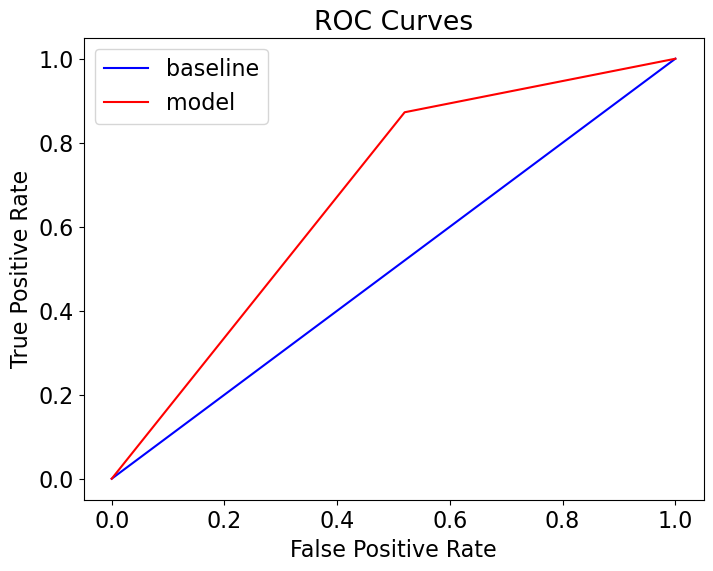

In [192]:
evaluate_model(predictions, probs, train_predictions, train_probs)

There we can see the problem with a single decision tree where the maximum depth is not limited: __severe overfitting to the training data__. 

### Confusion Matrix

In [197]:
from sklearn.metrics import confusion_matrix
import itertools

#  Helper function to plot Confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Oranges):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    Source: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.figure(figsize = (10, 10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, size = 24)
    plt.colorbar(aspect=4)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, size = 14)
    plt.yticks(tick_marks, classes, size = 14)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    
    # Labeling the plot
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), fontsize = 20,
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
        
    plt.grid(None)
    plt.tight_layout()
    plt.ylabel('True label', size = 18)
    plt.xlabel('Predicted label', size = 18)

Confusion matrix, without normalization
[[ 2677  2897]
 [ 3103 21239]]


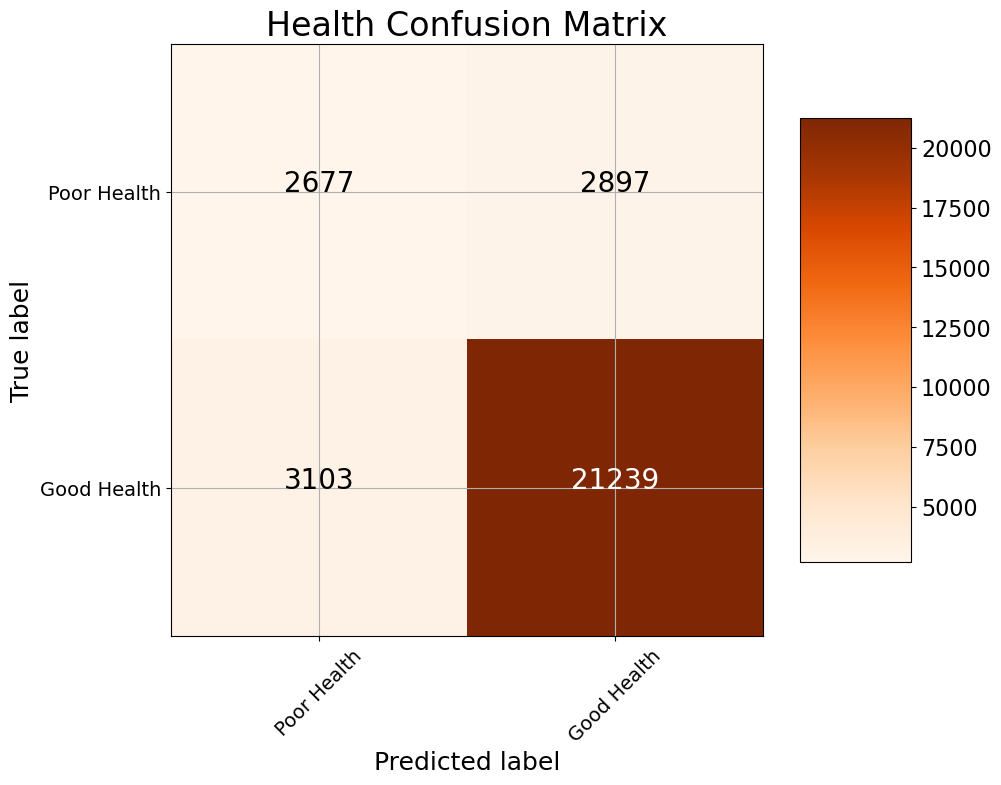

In [199]:
cm = confusion_matrix(test_labels, predictions)
plot_confusion_matrix(cm, classes = ['Poor Health', 'Good Health'],
                      title = 'Health Confusion Matrix')

This shows the classifications predicted by the model on the test data along with the real labels. We can see that our model has many false negatives (predicted good health but actually poor health) and false positives (predicted poor health but actually good health). 

### Feature Importances

Finally, we can take a look at the features considered most important by the Decision Tree. The values are computed by summing the reduction in Gini Impurity over all of the nodes of the tree in which the feature is used. 

In [221]:
fi = pd.DataFrame({'feature': features,
                   'importance': tree.feature_importances_}).sort_values('importance', ascending = False)
fi.head()

feature  importance
62   DIFFWALK    0.191702
58   QLACTLM2    0.030550
51    EMPLOY1    0.023743
64   DIFFALON    0.018419
245     _BMI5    0.016785

Meanings of each feature lies in this [data dictionary](https://www.kaggle.com/cdc/behavioral-risk-factor-surveillance-system#2015_formats.json) 

### Visualize Full Tree (Just for fun!@!!!)

In [238]:
#call(['C:\\Program Files\\Graphviz\\bin\\dot', '-Tpng', 'tree_real_data.dot', '-o', 'tree_real_data.png', '-Gdpi=200'])

In [232]:
export_graphviz(tree, out_file='tree_real_data.dot', 
                feature_names=features, class_names=['poor health', 'good health'], 
                filled=True, rounded=True, max_depth=6)

In [236]:
from sklearn.tree import export_graphviz
from subprocess import call
from IPython.display import Image

# 匯出 .dot 文件
export_graphviz(tree, 'tree_real_data.dot', rounded=True, 
                feature_names=features, max_depth=6,
                class_names=['poor health', 'good health'], filled=True)



# 將 .dot 文件轉換為 PNG 圖像
call(['C:\\Program Files\\Graphviz\\bin\\dot', '-Tpng', 'tree_real_data.dot', '-o', 'tree_real_data.png', '-Gdpi=200'])

# 在 Jupyter Notebook 中顯示圖片
Image(filename='tree_real_data.png')


### Summary
To reduce the variance of our model, 
- Limit the maximum depth or the number of leaf nodes
- Use more trees, each one trained on a random sampling of the observations (Random Forests)

## Homework - Can you reduce the depth of the tree to avoid overfitting?
- Use max_depth hyperparameter to control the depth of the tree
- Plot ROC AUC Curve
- Plot Confusion Matrix
- Is there overfitting?
- Is there improvement in the model on testing data?